<a href="https://colab.research.google.com/github/Jabaananth/DS_TripFare-Predicting-Urban-Taxi-Fare/blob/main/trip_Far_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAXI_TRIPFAR PROJECT

# IMPORT THE PAKAGE

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Read the file:

In [5]:
data=pd.read_csv(r'/taxi_fare.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# treat the data types

In [9]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])

In [10]:
data["day_name"]=data['tpep_pickup_datetime'].dt.day_name()

In [11]:
data["time"]=data['tpep_dropoff_datetime'].dt.time

In [12]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,time
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,Tuesday,00:07:55
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,Tuesday,00:11:06
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,Tuesday,00:31:06
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,Tuesday,00:00:00
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,Tuesday,00:00:00


In [13]:
data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","VendorID","store_and_fwd_flag","RatecodeID","fare_amount"], axis = 1, inplace=True)

In [14]:
data.shape

(212345, 14)

In [15]:
data.isnull().sum()

,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
payment_type,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


# encoding

In [16]:
le = LabelEncoder()

In [17]:
data['day_name_encoded'] = le.fit_transform(data['day_name'])

In [18]:
data = data.drop(columns=data.select_dtypes(include='object').columns)

# **fare_amount with tolls_amount corrlation high\**

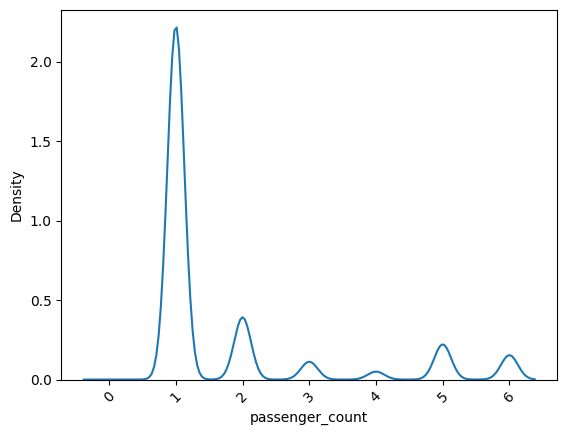

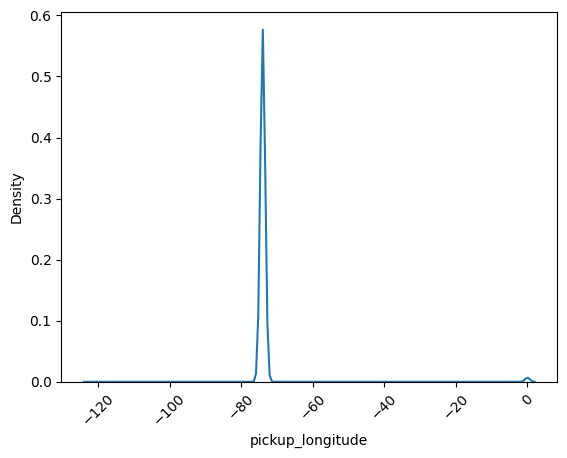

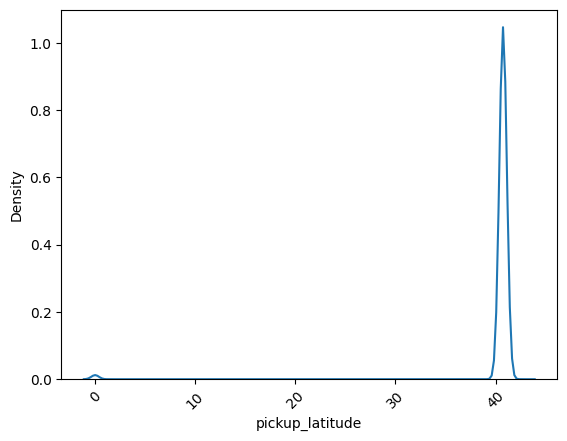

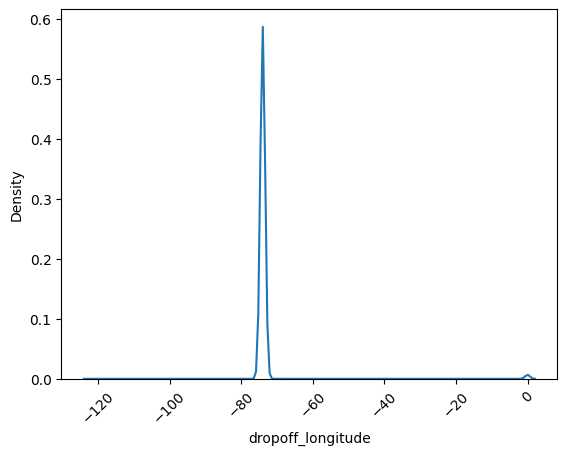

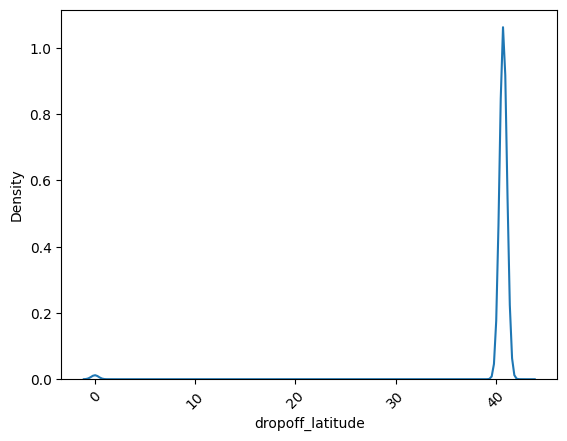

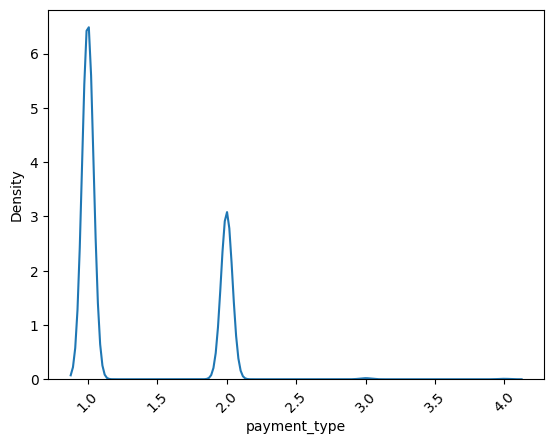

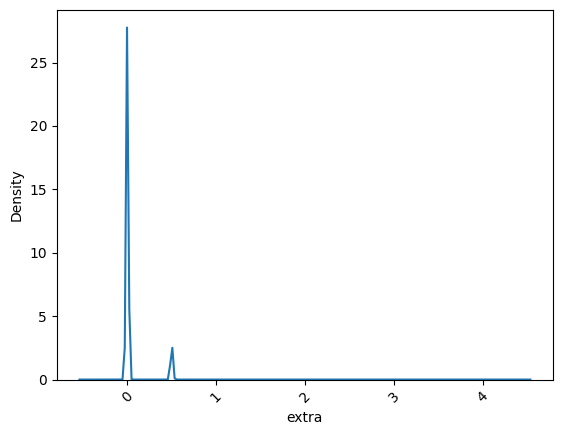

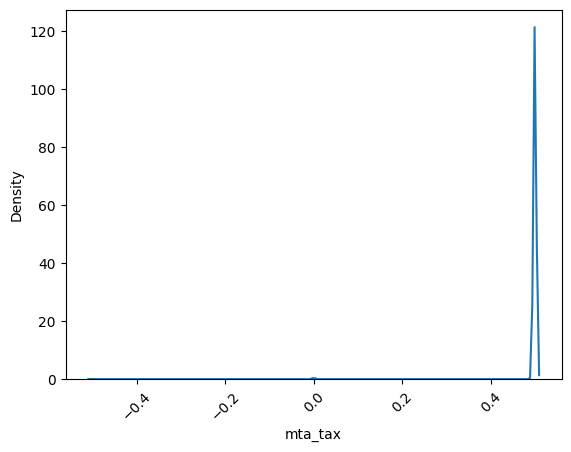

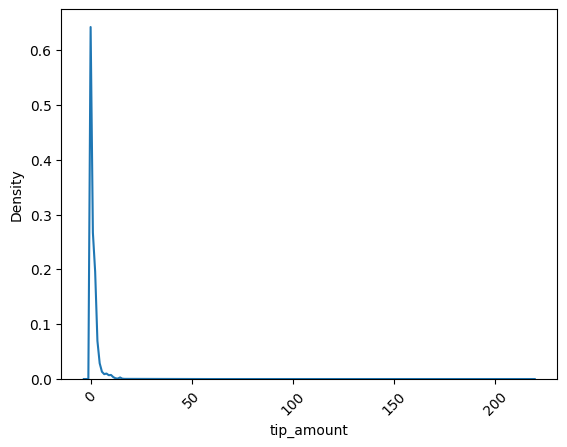

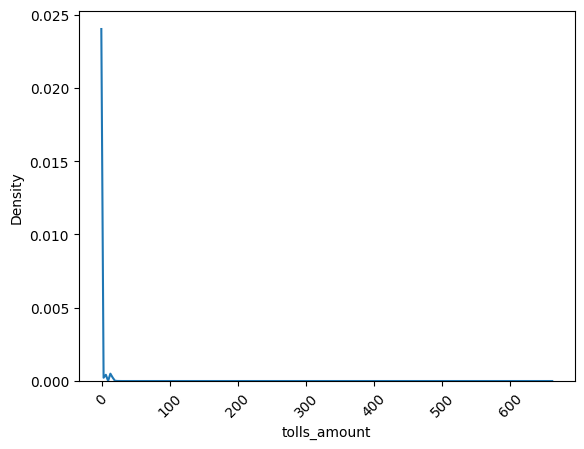

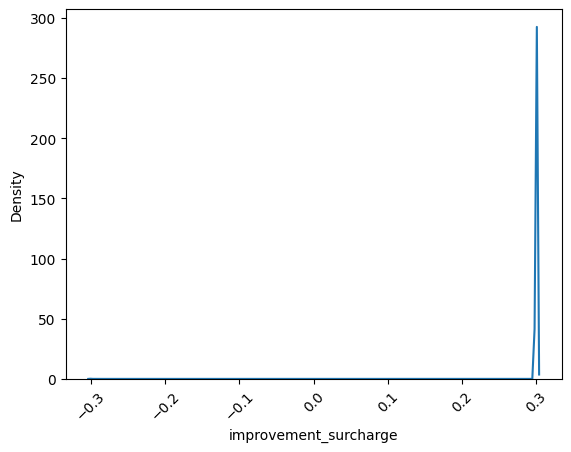

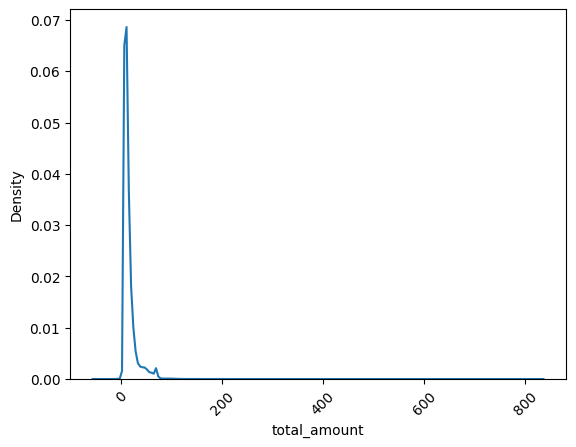

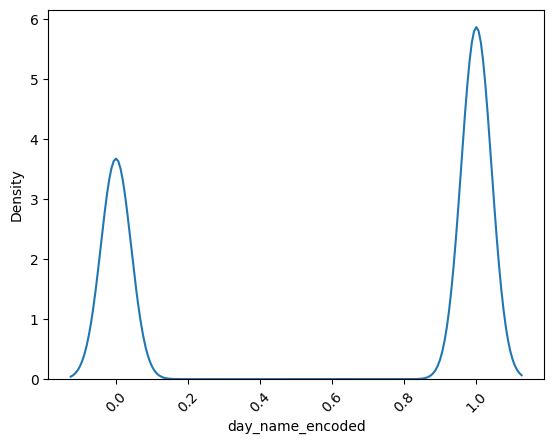

In [19]:
for i in data.columns:
    sns.kdeplot(data[i])
    plt.xticks(rotation=45)
    plt.show()

# outlier check

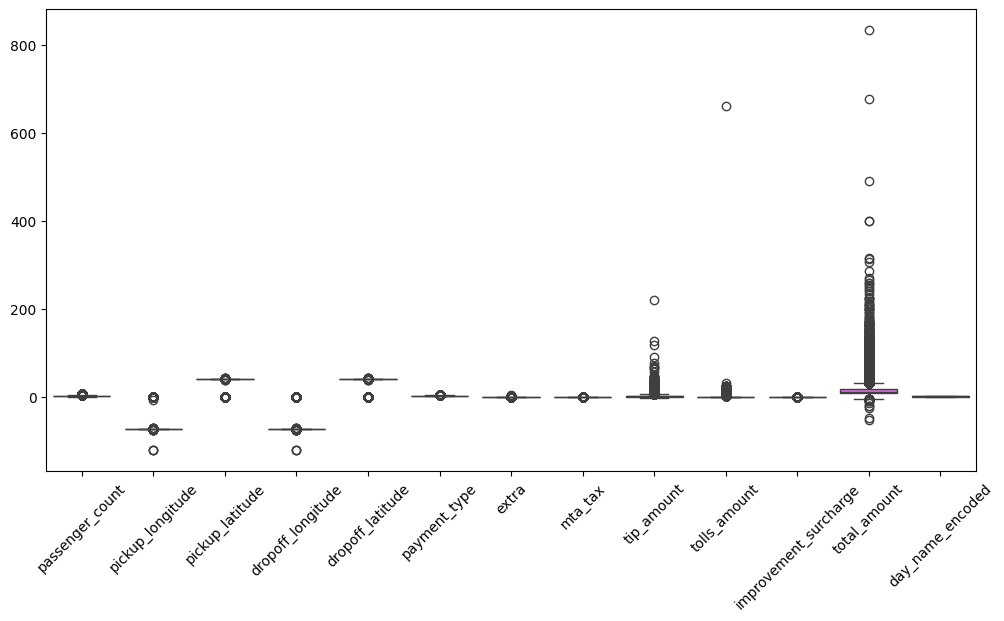

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data)
plt.show()

# StandardScaling

# trea the outlier

In [21]:
# StandardScaler

<Axes: >

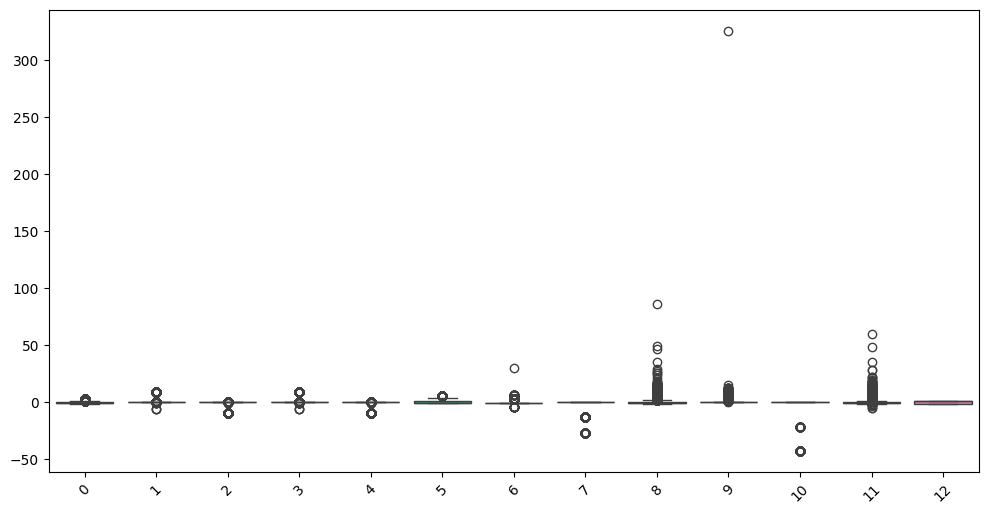

In [22]:
plt.figure(figsize=(12,6))
st=StandardScaler()
data=data.select_dtypes(exclude='datetime64[ns]')
plt.xticks(rotation=45)
sns.boxplot(st.fit_transform(data))

In [23]:
# this data outlier is high. so, we going to use data and without datetime

# statastics Analis

In [24]:
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'day_name_encoded'],
      dtype='object')

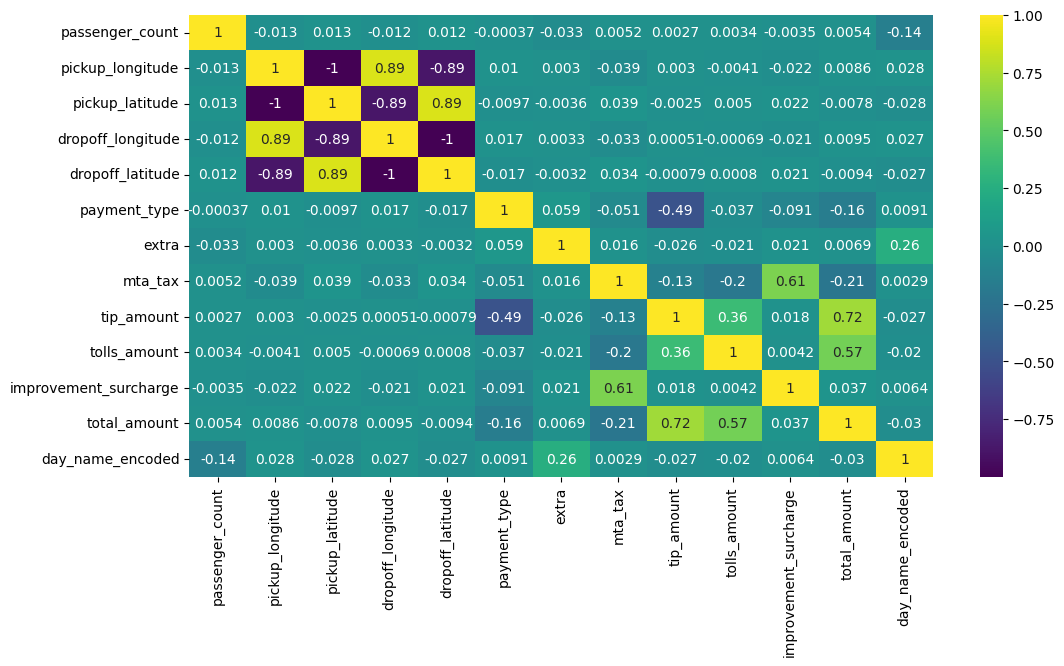

In [25]:
corr=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

In [26]:
# target is total_amount

# Split the data

In [27]:
val = data.drop('total_amount', axis=1)
tr = data['total_amount']
val_train, val_test, tr_train, tr_test = train_test_split(val, tr, test_size=0.2, random_state=42)

In [28]:
val.values

array([[  1.        , -73.97674561,  40.76515198, ...,   0.        ,
          0.3       ,   1.        ],
       [  1.        , -73.98348236,  40.76792526, ...,   0.        ,
          0.3       ,   1.        ],
       [  2.        , -73.78202057,  40.64480972, ...,   0.        ,
          0.3       ,   1.        ],
       ...,
       [  1.        , -73.99117279,  40.73316956, ...,   0.        ,
          0.3       ,   1.        ],
       [  2.        , -73.9720993 ,  40.78644562, ...,   0.        ,
          0.3       ,   1.        ],
       [  1.        , -73.98876953,  40.71266174, ...,   0.        ,
          0.3       ,   1.        ]])

In [29]:
tr.value_counts()

,count
total_amount,
7.30,5167
6.80,5076
7.80,4941
8.30,4931
6.30,4712
...,...
83.92,1
27.90,1
70.31,1


# LinearRegression

In [30]:
# Training performance

In [31]:
lin_reg_model= LinearRegression()
lin_reg_model.fit(val_train, tr_train)

LinearRegression()

In [32]:
# Predict

In [33]:
tr_pred = lin_reg_model.predict(val_train)
ts_pred = lin_reg_model.predict(val_test)

In [34]:
# Testing performance

In [35]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result = {
    "model_Name" : "lin_reg_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result)

{'model_Name': 'lin_reg_model', 'R2': 0.6690291021200707, 'MSE': 64.82570966393084, 'RMSE': np.float64(8.051441464975749), 'MAE': 4.348728671168075}


# Ridge Regression

In [36]:
# Training performance

In [37]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.1, max_iter=500)
Ridge.fit(val_train, tr_train)

Ridge(alpha=0.1, max_iter=500)

In [38]:
# Testing performance

In [39]:
tr_pred = Ridge.predict(val_train)
ts_pred = Ridge.predict(val_test)

In [40]:
# Testing performance

In [41]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result2 = {
    "model_Name" : "Ridge",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result2)

{'model_Name': 'Ridge', 'R2': 0.669047395036867, 'MSE': 64.82212671654561, 'RMSE': np.float64(8.0512189584277), 'MAE': 4.348487915072034}


In [42]:
# Hyperparameter tuning

In [43]:
param_grid = {
    "alpha": [0.001, 0.0001, 0.1, 0.4, 0.95, 5, 6, 9, 100, 200, 300, 500],
    "max_iter": [50, 100, 300, 400, 600, 900, 1500, 5000]
}

grid_search = GridSearchCV(Ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(val_train, tr_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1, max_iter=500), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0001, 0.1, 0.4, 0.95, 5, 6, 9, 100,
                                   200, 300, 500],
                         'max_iter': [50, 100, 300, 400, 600, 900, 1500, 5000]},
             scoring='r2')

In [44]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'alpha': 0.0001, 'max_iter': 50}
Best R² Score (CV): 0.5661507762555047


In [45]:
best_ridge = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Lasso Regression

In [46]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(val_train, tr_train)

Lasso(alpha=0.5)

In [47]:
# Testing performance

In [48]:
tr_pred = lasso_model.predict(val_train)
ts_pred = lasso_model.predict(val_test)

In [49]:
# Testing performance

In [50]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "lasso_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'lasso_model', 'R2': 0.6496516707895772, 'MSE': 68.6210757988683, 'RMSE': np.float64(8.283783905852946), 'MAE': 4.571381704103348}


In [51]:
# Hyperparameter tuning

In [52]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [500, 1000, 3000]
}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(val_train, tr_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+06, tolerance: 3.091e+03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(alpha=0.5), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [500, 1000, 3000]},
             scoring='r2')

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'alpha': 0.0001, 'max_iter': 500}
Best R² Score (CV): 0.5669229667671928


In [54]:
lasso_best_model = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Random Forest

In [78]:
fs_model = RandomForestRegressor(n_estimators=500, random_state=60)
fs_model.fit(val_train, tr_train)

RandomForestRegressor(n_estimators=500, random_state=60)

In [83]:
# Training performance

In [80]:
tr_pred = fs_model.predict(val_train)
ts_pred = fs_model.predict(val_test)

In [81]:
# Testing performance

In [82]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "fs",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'fs', 'R2': 0.8722097890483622, 'MSE': 25.029666251951483, 'RMSE': np.float64(5.0029657456304335), 'MAE': 1.3564987030982156}


# Gradient Boosting

In [55]:
gra_boot_model=GradientBoostingRegressor(n_estimators=100, random_state=42)
gra_boot_model.fit(val_train, tr_train)

GradientBoostingRegressor(random_state=42)

In [56]:
# Training performance

In [57]:
tr_pred = gra_boot_model.predict(val_train)
ts_pred = gra_boot_model.predict(val_test)

In [58]:
# Testing performance

In [59]:
r2 = r2_score(tr_test, ts_pred)
mse = mean_squared_error(tr_test, ts_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tr_test, ts_pred)

result3 = {
    "model_Name" : "gra_boot_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

print(result3)

{'model_Name': 'gra_boot_model', 'R2': 0.8316978158680622, 'MSE': 32.96455547671899, 'RMSE': np.float64(5.741476767933403), 'MAE': 2.8571482812643745}


In [60]:
# Hyperparameter tuning

In [61]:
val = data.drop('total_amount', axis=1)
tr = data['total_amount']
val_train, val_test, tr_train, tr_test = train_test_split(val, tr, test_size=0.2, random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate model
gra_boot_model=GradientBoostingRegressor(n_estimators=100, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=gra_boot_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Fit the model
grid_search.fit(val_train, tr_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best R² Score (CV): 0.8889723134365025


In [86]:
best_gra_boot_model = grid_search.best_estimator_
ts_pred = best_ridge.predict(val_test)

# Evaluate on Test Data

In [69]:
best_model = grid_search.best_estimator_

# Predict on test set
test_predictions = best_model.predict(val_test)

# Evaluate
r2 = r2_score(tr_test, test_predictions)
mae = mean_absolute_error(tr_test, test_predictions)
mse = mean_squared_error(tr_test, test_predictions)
rmse = np.sqrt(mse)
result= {
    "model_Name" : "gra_boot_model",
    'R2': r2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
}

for key, value in result.items():
    print(f"{key}: {value}")


model_Name: gra_boot_model
R2: 0.8850324092870979
MSE: 22.518160068019018
RMSE: 4.745330343402767
MAE: 1.8986084381957635


In [65]:
# Higher R² → Better fit

# Lower MSE, RMSE, MAE → Better accuracy

# Best_Model selection

In [71]:
best_model = grid_search.best_estimator_

In [72]:
best_model

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

# Training

In [74]:
root_mean_squared_error( tr_test, ts_pred)

8.051441238437423

# coverting to Pickle format

In [77]:
best_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)
best_model.fit( val_train, tr_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [79]:
print(tr_pred,"\n\n\n\n",ts_pred)

[ 9.12037409  9.92623072 47.36774177 ...  9.79152993 19.09260627
 67.47837213] 



 [14.58241482 12.65570849  9.91405162 ...  9.89334094 35.48382096
 11.9753412 ]


# Save the model using pickle

In [84]:
import pickle
with open('best_model_GBR.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'best_ridge_model.pkl")

Model saved as 'best_ridge_model.pkl


In [85]:
with open('best_model_GBR.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


tr_pred = loaded_model.predict(val_test)